---
## **Neural Network**
---

---
- Perceptron: single neuron without applications of activation function
---
- Determine the product of $ w^T.x$ by using of user defined cutoff, if above the cutoff the perceptron will predict otherwise no
- Perceptron predicts the binary mode of classification in machine learning in a regular fashion when there is a slight change in $ w^T.x$, perceptron can't predict. it is then when the sigmoid function applied on it the output will work properly.
- Sigmoid function is the system that will be used to modify the output accordingly with the slight change of the product of $ w^T.x$
- The sigmoid activation function will change the Linear regression to Logistic regression.
- ReLU is better than sigmoid activation function as it vanishes the gradient problem during training of NN
- Hidden layers predicts connection between inputs automatically
- Depending on our data we will use different types of Neural Networks, for tabular data we will use standard NN, for images we will use CNN and for sequential data we will use RNN.

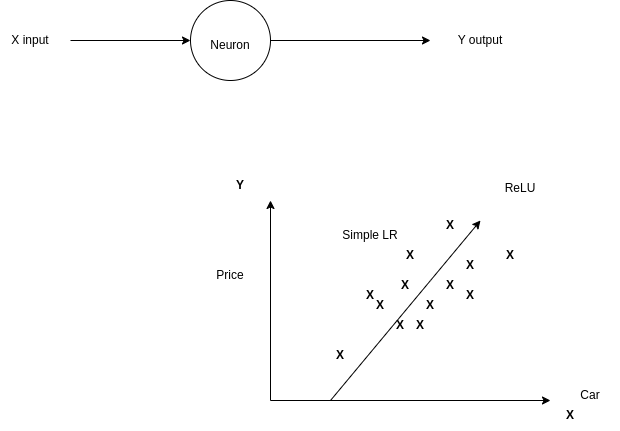

---
### **Binary Classification**
---
- Classification Problem: for an $ x \in R^n$ and $ y  \in \{ 0, 1\}$
- $ m_{train}: \langle x^1, y^1 \rangle , \langle x^2, y^2 \rangle .....\langle x^m, y^m \rangle $
- $$ X =  
\begin{bmatrix}
\vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots \\
x^1, & x^2, & x^3, & x^m \\
\vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots
\end{bmatrix} \tag{1}
$$

- $ X \in \mathbb{R}^{n_x*m} \Rightarrow X.shape = \langle n_x,m \rangle \tag{2}$ 

- $$ Y = \begin{bmatrix} y^1, & y^2, & y^3, & y^m \end{bmatrix} \tag{3}$$
- $ Y \in \mathbb{R}^{1*m} \Rightarrow Y.shape = \langle 1,m \rangle \tag{4}$ 
- ***Where Nx is the size of the input vector, M is the number of training vectors and Ny is the size of the output vector***

---
## **Logistic Regression**
---
- Given $X$, Determine  $ \hat{y} = { P(y=1 \mid x)}$, where $ x \in \mathbb{R}$ and $ 0 \leqslant \hat{y}  \leqslant 1$
- Parameters: $ w \in \mathbb{R}^{n_x}$, $ b  \in \mathbb{R}$
- We will determine the logistic regression of $ \hat{y} = \sigma \langle w^T.x + b \rangle $ as the Linear regression function doesn't make sense $ \langle w^T.x + b \rangle$
- $$ \sigma(z) = \frac{1}{1 + e^{-z} }$$

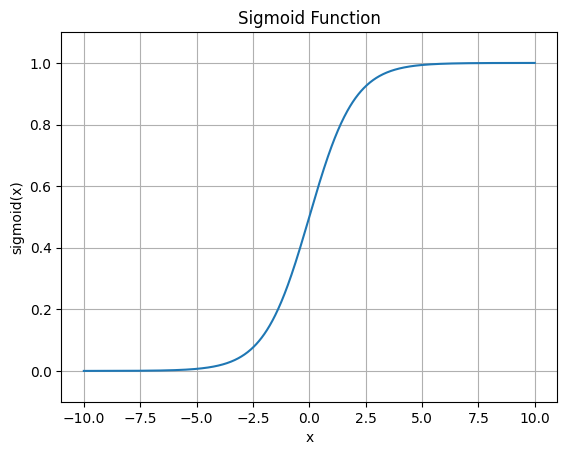

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 1000)
y = sigma(x)
# Plot the graph
plt.plot(x, y)
# Add labels and title
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Function")
# Set limits slightly bigger than range of function
plt.xlim([-11, 11])
plt.ylim([-0.1, 1.1])
# Grid
plt.grid(True)
# Show the plot
plt.show()

- If $ z $ very large $ \sigma \langle z \rangle $ close to 1, and if $ z $ very small $ \sigma \langle z \rangle $ close to 0.

---
### **Cost Function of Logistic Regression**
---
- $ L \langle y, \hat{y} \rangle = \frac{1}{2}\langle \hat{y} - y \rangle^2$ as we want our shape to be convex
- $ L \langle y, \hat{y} \rangle = -\langle y \log\hat{y} +\langle 1 - y \rangle \log \langle 1 - \hat{y} \rangle \rangle $
- if $ y=1$, $L \langle y,\hat{y}\rangle $ = $-\log\hat{y}$ this is if we want $\log\hat{y}$ to be large 
- if $ y=0$, $L \langle y,\hat{y}\rangle $ = $-\log \langle 1 - \hat{y}\rangle $ this is if we want $\log \langle 1 - \hat{y}\rangle$ to be large
- the above equation is if we want to measure in a single training sample, but if we want to measure in entire training sample? we will use the ***Cost Function***
- $$J(w,b) = $\frac{1}{m} \sum_{i=1}^{m}$($L$($\hat{y}^{[i]},y^{[i]}))$$$

---
### **Gradient Descent**
---
- It is a numerical optimization algorithm that aims to find the optimal parameters—weights and biases—of a neural network by minimizing a defined cost function.
- Minimises the cost function of a neural network model during training.
- It works by iteratively adjusting the weights or parameters of the model in the direction of the negative gradient of the cost function until the minimum of the cost function is reached.
- The learning happens during the backpropagation while training the neural network-based model. 
- w = $ w - \alpha * d(J(w,b) / dw)$ : how much the function slopes in the w direction
- b = $ b - \alpha * d(J(w,b) / db)$ : how much the function slopes in the d direction

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
torch.manual_seed(42)

In [5]:
num_samples = 1000
x = torch.randn(num_samples, 2)
print(x)

tensor([[ 1.9269,  1.4873],
        [ 0.9007, -2.1055],
        [ 0.6784, -1.2345],
        ...,
        [ 0.0731,  0.9967],
        [ 1.0238, -1.2133],
        [ 0.9745,  0.4532]])


In [6]:
true_weights = torch.tensor([1.3, -1])
true_bias    = torch.tensor([-3.5])
print(true_weights)
print(true_bias)

tensor([ 1.3000, -1.0000])
tensor([-3.5000])


In [7]:
y = x @ true_weights.T + true_bias
print(y)

/tmp/ipykernel_46904/1323221940.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3675.)
  y = x @ true_weights.T + true_bias


tensor([-2.4823e+00, -2.2355e-01, -1.3835e+00, -1.9513e+00, -6.1265e+00,
        -2.6066e+00, -3.8868e+00, -5.2619e+00, -1.2054e+00, -4.5862e+00,
        -5.5639e+00, -4.1396e+00, -3.1336e+00, -4.0411e+00, -3.8429e+00,
        -4.6869e+00, -4.4288e+00, -5.5077e+00, -2.6609e+00, -2.3280e+00,
        -6.5205e+00, -4.0426e+00, -7.2792e+00, -4.6171e+00, -4.0298e+00,
        -3.9244e+00, -5.3258e+00, -3.8222e+00, -5.3602e+00, -4.2581e+00,
        -5.4717e+00, -6.4234e+00, -2.4777e+00, -1.1397e+00, -2.8520e+00,
        -6.1490e+00, -4.2476e+00, -3.8527e+00, -2.1108e+00, -5.6175e+00,
        -3.1471e+00, -4.6575e+00, -3.3276e+00, -2.0681e+00, -2.0513e+00,
        -5.4682e+00, -4.9112e+00, -2.2484e+00, -7.2504e+00, -2.5087e+00,
        -3.2503e+00, -1.6628e+00, -4.4936e+00, -3.1523e+00, -4.4288e+00,
        -3.1981e+00, -5.2918e+00, -4.7560e+00, -2.6471e+00, -4.5337e+00,
        -3.7573e+00, -4.0919e+00, -2.4164e+00, -2.9755e+00, -2.0014e+00,
        -4.2375e+00, -5.3123e+00, -3.2248e+00, -2.0

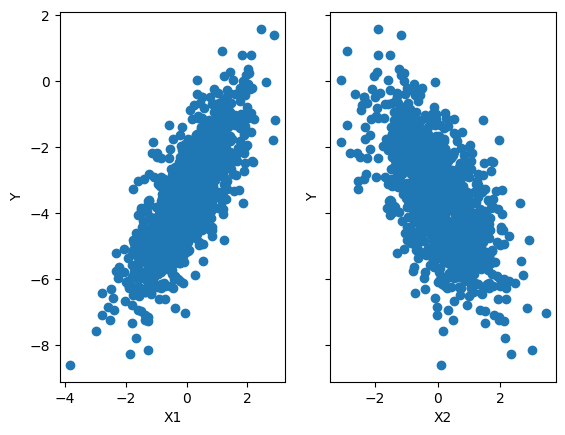

In [8]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].scatter(x[:,0],y)
ax[1].scatter(x[:,1],y)
 
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Y')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Y')
plt.show()

In [9]:
class LRNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(LRNN, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        out = self.linear(x)
        return out
# Define the input and output dimensions
input_size = x.shape[1]
print(input_size)
output_size = 1

2


---
#### **Forward Propagation**
---

In [10]:
model = LRNN(input_size, output_size)

In [11]:
# create a random weight & bias tensor
weight = torch.randn(1, input_size)
bias   = torch.rand(1)
 
# create a nn.Parameter object from the weight & bias tensor
weight_param = nn.Parameter(weight)
bias_param   = nn.Parameter(bias)
 
# assign the weight & bias parameter to the linear layer
model.linear.weight = weight_param
model.linear.bias   = bias_param
 
weight, bias = model.parameters()
print('Weight :',weight)
print('bias :',bias)

Weight : Parameter containing:
tensor([[-0.3239,  0.5574]], requires_grad=True)
bias : Parameter containing:
tensor([0.5710], requires_grad=True)


In [12]:
# prediction
y_p = model(x)
y_p[:5]

tensor([[ 0.7760],
        [-0.8944],
        [-0.3369],
        [-0.3095],
        [ 1.7338]], grad_fn=<SliceBackward0>)

In [13]:
# define the loss function 
def mean_square(prediction, actual):
    error = (actual-prediction)**2
    return error.mean()
# Find the total mean squared error
loss = mean_square(y_p, y)
loss

tensor(19.9126, grad_fn=<MeanBackward0>)

---
#### **Backward Propagation**
---
- Find the optimal value of weight w and bias b which can fit our model well by giving very less or minimum error as possible
- $ J(w,b) = \frac{1}{n}$($\hat{y} - y)$ for a single row

- **Find the gradient using loss.backward()**

In [14]:
# Find the gradient using 
loss.backward()
# Learning Rate
learning_rate = 0.001

- **Get the parameter using model.linear.weight and model.linear.bias**

In [15]:
# Model Parameter
w = model.linear.weight
b = model.linear.bias

- **Update the parameter using the above-defined equation.**

In [16]:
# Matually Update the model parameter
w = w - learning_rate * w.grad
b = b - learning_rate * b.grad

- **Again assign the model parameter to our mode**

In [17]:
# assign the weight & bias parameter to the linear layer
model.linear.weight = nn.Parameter(w)
model.linear.bias   = nn.Parameter(b)

Epoch [100/1000], weight:[[-0.2612447  0.4433256]], bias:[-0.18397866] Loss: 14.1333
Epoch [200/1000], weight:[[-0.2109887   0.35312882]], bias:[-0.79475576] Loss: 10.2715
Epoch [300/1000], weight:[[-0.17027129  0.2810834 ]], bias:[-1.2943137] Loss: 7.6910
Epoch [400/1000], weight:[[-0.13730244  0.22356813]], bias:[-1.7029109] Loss: 5.9665
Epoch [500/1000], weight:[[-0.11062479  0.17767936]], bias:[-2.0371149] Loss: 4.8141
Epoch [600/1000], weight:[[-0.08905232  0.14108914]], bias:[-2.3104742] Loss: 4.0439
Epoch [700/1000], weight:[[-0.07162026  0.11193229]], bias:[-2.5340717] Loss: 3.5291
Epoch [800/1000], weight:[[-0.05754424  0.08871455]], bias:[-2.7169664] Loss: 3.1850
Epoch [900/1000], weight:[[-0.04618686  0.07023972]], bias:[-2.8665729] Loss: 2.9550
Epoch [1000/1000], weight:[[-0.03703037  0.05555023]], bias:[-2.9889488] Loss: 2.8013


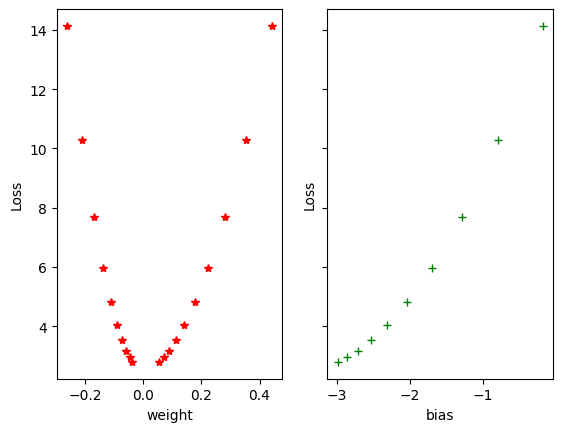

In [19]:
# Number of epochs
num_epochs = 1000
 
# Learning Rate
learning_rate = 0.01
 
# SUBPLOT WEIGHT & BIAS VS lOSSES
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
 
for epoch in range(num_epochs):
    # Forward pass
    y_p = model(x)
    loss = mean_square(y_p, y)
     
    # Backproogation 
    # Find the fradient using 
    loss.backward()
 
    # Learning Rate
    learning_rate = 0.001
 
    # Model Parameter
    w = model.linear.weight
    b = model.linear.bias
 
    # Matually Update the model parameter
    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad
 
    # assign the weight & bias parameter to the linear layer
    model.linear.weight = nn.Parameter(w)
    model.linear.bias   = nn.Parameter(b)
             
    if (epoch+1) % 100 == 0:
        ax1.plot(w.detach().numpy(),loss.item(),'r*-')
        ax2.plot(b.detach().numpy(),loss.item(),'g+-')
        print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
            epoch+1,num_epochs,
            w.detach().numpy(),
            b.detach().numpy(),
            loss.item()))
         
ax1.set_xlabel('weight')
ax2.set_xlabel('bias')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Loss')
plt.show()

In [20]:
#print the optimal value
w = model.linear.weight
b = model.linear.bias
 
print('weight(W) = {} \n  bias(b) = {}'.format(
  w.abs(), 
  b.abs()))

weight(W) = tensor([[0.0370, 0.0556]], grad_fn=<AbsBackward0>) 
  bias(b) = tensor([2.9889], grad_fn=<AbsBackward0>)


In [21]:
pred =  x @ w.T + b
pred[:5]

tensor([[-2.9777],
        [-3.1393],
        [-3.0827],
        [-3.0765],
        [-2.8695]], grad_fn=<SliceBackward0>)

---
#### **Prevention of Gradient Vanishing and Explosion**
---
- Weight Regularization - ReLU
- Gradient Clipping - Setting the minimum and maximum gradients during the backpropagation
- Batch Normalization